In [2]:
# Improved Diffusion Model for Rebuilding Ligands in Protein Cavities
# With Enhanced Aromatic Chemistry Perception
# ---------------------------------------------------------

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdShapeHelpers, rdMolAlign
from rdkit.Geometry import Point3D
import py3Dmol
import requests
import io
import os
from scipy.spatial import ConvexHull
import pandas as pd
from tqdm.notebook import tqdm

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


1. Downloading PDB file for 1hsg...
2. Extracting ligand MK1 with proper chemistry...
Extracting ligand MK1 from 1hsg.pdb...
Using SMILES template: CC(C)(C)NC(=O)[C@@H]1CN(CCN1C[C@@H](O)C[C@@H](Cc2ccccc2)C(=O)N[C@@H]3[C@H](O)Cc4ccccc34)Cc5cccnc5
Added hydrogens to the ligand. Atom count: 92
   Ligand has 92 atoms
   Detected 18 aromatic atoms in 3 aromatic rings
   Visualizing ligand with aromatic perception...


[11:22:42] WARNING: More than one matching pattern found - picking one



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3. Extracting binding site...
   Binding site has 179 atoms
4. Determining cavity parameters...
   Cavity center: [12.97008923 22.71848568  5.75848109]
   Cavity radius: 12.38 Å
5. Visualizing system...


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

6. Preparing ligand features with aromaticity...
   Coordinates shape: torch.Size([92, 3])
   Atom types: tensor([7, 6, 6, 6, 8, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 8, 7, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
   Aromaticity: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])
7. Preparing training dataset with aromatic constraints...
Found 3 aromatic rings
Generated 200 valid conformers for training
8. Initializing aromatic-a

  0%|          | 0/1500 [00:00<?, ?it/s]

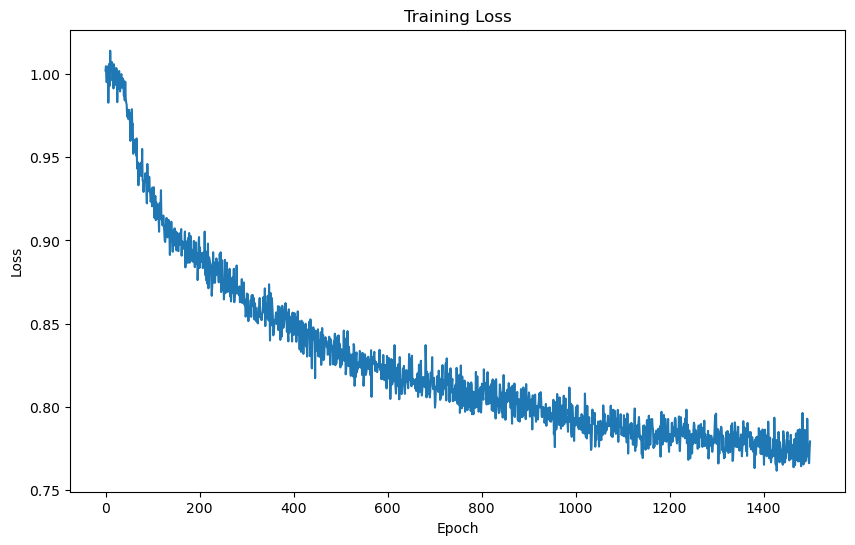

10. Generating molecules with aromatic preservation...
    Generating sample 1/5...


  0%|          | 0/500 [00:00<?, ?it/s]

    Sample 1 evaluation: {'within_cavity': False, 'shape_similarity': 1.0, 'protein_clashes': 0, 'num_atoms': 92, 'num_bonds': 96, 'aromatic_atoms': 18, 'aromatic_rings': 3}


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Generating sample 2/5...


  0%|          | 0/500 [00:00<?, ?it/s]

    Sample 2 evaluation: {'within_cavity': True, 'shape_similarity': 1.0, 'protein_clashes': 0, 'num_atoms': 92, 'num_bonds': 96, 'aromatic_atoms': 18, 'aromatic_rings': 3}


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Generating sample 3/5...


  0%|          | 0/500 [00:00<?, ?it/s]

    Sample 3 evaluation: {'within_cavity': False, 'shape_similarity': 1.0, 'protein_clashes': 3, 'num_atoms': 92, 'num_bonds': 96, 'aromatic_atoms': 18, 'aromatic_rings': 3}


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Generating sample 4/5...


  0%|          | 0/500 [00:00<?, ?it/s]

    Sample 4 evaluation: {'within_cavity': False, 'shape_similarity': 1.0, 'protein_clashes': 0, 'num_atoms': 92, 'num_bonds': 96, 'aromatic_atoms': 18, 'aromatic_rings': 3}


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Generating sample 5/5...


  0%|          | 0/500 [00:00<?, ?it/s]

    Sample 5 evaluation: {'within_cavity': True, 'shape_similarity': 1.0, 'protein_clashes': 2, 'num_atoms': 92, 'num_bonds': 96, 'aromatic_atoms': 18, 'aromatic_rings': 3}


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

11. Evaluation results:


,within_cavity,shape_similarity,protein_clashes,num_atoms,num_bonds,aromatic_atoms,aromatic_rings
0,False,1.0,0,92,96,18,3
1,True,1.0,0,92,96,18,3
2,False,1.0,3,92,96,18,3
3,False,1.0,0,92,96,18,3
4,True,1.0,2,92,96,18,3


Original ligand (green) vs Generated ligand (cyan):


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:

# Part 1: PDB Processing and Cavity Extraction with Improved Aromatic Perception
# ----------------------------------------------------------------------------

def download_pdb(pdb_id):
    """Download a PDB file from the RCSB PDB database"""
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"{pdb_id}.pdb", "wb") as f:
            f.write(response.content)
        return f"{pdb_id}.pdb"
    else:
        raise Exception(f"Failed to download PDB {pdb_id}. Status code: {response.status_code}")

def get_ligand_smiles_from_pdb_id(pdb_id, ligand_code):
    """Fetch SMILES for a ligand from RCSB PDB API"""
    url = f"https://data.rcsb.org/rest/v1/core/ligand/{ligand_code}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'smiles' in data:
            return data['smiles']
    
    # Fallback for known ligands
    known_ligands = {
        "MK1": "CC(C)(C)NC(=O)[C@@H]1CN(CCN1C[C@@H](O)C[C@@H](Cc2ccccc2)C(=O)N[C@@H]3[C@H](O)Cc4ccccc34)Cc5cccnc5"
    }
    
    if ligand_code in known_ligands:
        return known_ligands[ligand_code]
    
    print(f"Warning: Could not fetch SMILES for {ligand_code}, trying to extract without template")
    return None

def extract_ligand_with_correct_chemistry(pdb_file, ligand_code, smiles=None):
    """Extract ligand from PDB with correct bond orders and aromaticity"""
    print(f"Extracting ligand {ligand_code} from {pdb_file}...")
    
    # Get the ligand atoms from the PDB file
    ligand_block = "HEADER    LIGAND\n"
    with open(pdb_file, 'r') as f:
        in_ligand = False
        for line in f:
            if line.startswith("HETATM") and line[17:20].strip() == ligand_code:
                in_ligand = True
                ligand_block += line
            elif in_ligand and line.startswith("CONECT"):
                ligand_block += line
            elif in_ligand and (line.startswith("HETATM") and line[17:20].strip() != ligand_code):
                in_ligand = False
    
    # Write the ligand to a temporary file
    ligand_file = f"{ligand_code}_from_{pdb_file.split('.')[0]}.pdb"
    with open(ligand_file, 'w') as f:
        f.write(ligand_block)
    
    # Read the ligand into an RDKit molecule - this will create a molecule with only atomic coordinates
    # but no bond orders, aromaticity, etc.
    raw_ligand = Chem.MolFromPDBFile(ligand_file, removeHs=False, sanitize=False)
    if not raw_ligand:
        raise ValueError(f"Failed to extract ligand {ligand_code} from PDB file")
    
    # If a SMILES template is provided, use it to assign correct chemistry
    if smiles:
        print(f"Using SMILES template: {smiles}")
        template_mol = Chem.MolFromSmiles(smiles)
        if not template_mol:
            print("Warning: Invalid SMILES template, extracting without template")
            fixed_mol = process_raw_ligand(raw_ligand)
        else:
            # Try different methods to assign proper chemistry
            fixed_mol = assign_chemistry_from_template(raw_ligand, template_mol)
            if not fixed_mol:
                fixed_mol = process_raw_ligand(raw_ligand)
    else:
        # Fallback: process raw ligand as best as possible
        fixed_mol = process_raw_ligand(raw_ligand)
    
    # Add hydrogens explicitly after aromaticity has been perceived
    try:
        fixed_mol = Chem.AddHs(fixed_mol, addCoords=True)
        print(f"Added hydrogens to the ligand. Atom count: {fixed_mol.GetNumAtoms()}")
    except Exception as e:
        print(f"Warning: Failed to add hydrogens: {e}")
    
    return fixed_mol, ligand_file

def process_raw_ligand(raw_mol):
    """Process a raw molecule extracted from PDB without a template"""
    try:
        # Try to add hydrogens and sanitize the molecule
        mol = Chem.AddHs(raw_mol)
        Chem.SanitizeMol(mol)
        
        # Try to perceive aromaticity based on geometry
        Chem.SetAromaticity(mol, Chem.AromaticityModel.AROMATICITY_MDL)
        
        # Try to use force field to fix the structure - this sometimes helps with bond orders
        try:
            AllChem.MMFFOptimizeMolecule(mol)
        except:
            try:
                AllChem.UFFOptimizeMolecule(mol)
            except:
                pass
        
        return mol
    except Exception as e:
        print(f"Warning: Could not process raw ligand: {e}")
        # Return the original molecule if processing fails
        return raw_mol

def assign_chemistry_from_template(raw_mol, template_mol):
    """Assign correct chemistry to a raw molecule using a template"""
    try:
        # Method 1: Direct template assignment
        mol = AllChem.AssignBondOrdersFromTemplate(template_mol, raw_mol)
        if mol:
            try:
                Chem.SanitizeMol(mol)
                return mol
            except:
                print("Warning: Template assigned but sanitization failed")
        
        # Method 2: Try matching substructures
        matches = raw_mol.GetSubstructMatches(template_mol, uniquify=False)
        if matches:
            for match in matches:
                try:
                    mol = Chem.RWMol(raw_mol)
                    # Copy bond orders from template based on atom mapping
                    for bond in template_mol.GetBonds():
                        begin_idx = match[bond.GetBeginAtomIdx()]
                        end_idx = match[bond.GetEndAtomIdx()]
                        mol.AddBond(begin_idx, end_idx, bond.GetBondType())
                    
                    mol = mol.GetMol()
                    Chem.SanitizeMol(mol)
                    return mol
                except:
                    continue
        
        # Method 3: 3D alignment and then bond order assignment
        print("Trying 3D alignment method...")
        # First create a 3D version of the template
        template_3d = Chem.AddHs(template_mol)
        AllChem.EmbedMolecule(template_3d, AllChem.ETKDG())
        
        # Now try to align the raw molecule to the template
        raw_3d = Chem.AddHs(raw_mol)
        
        # Need to create a mapping between atoms
        try:
            # Get the MCS (Maximum Common Substructure)
            mcs = rdMolAlign.GetO3A(raw_3d, template_3d)
            mcs.Align()
            
            # Now try to transfer bond orders
            mol = Chem.RWMol(raw_3d)
            
            # Copy bond orders from template based on proximity
            for bond in template_3d.GetBonds():
                begin_atom = template_3d.GetAtomWithIdx(bond.GetBeginAtomIdx())
                end_atom = template_3d.GetAtomWithIdx(bond.GetEndAtomIdx())
                
                begin_pos = template_3d.GetConformer().GetAtomPosition(begin_atom.GetIdx())
                end_pos = template_3d.GetConformer().GetAtomPosition(end_atom.GetIdx())
                
                # Find closest atoms in raw_3d
                closest_begin = -1
                closest_end = -1
                min_dist_begin = float('inf')
                min_dist_end = float('inf')
                
                for atom in raw_3d.GetAtoms():
                    idx = atom.GetIdx()
                    pos = raw_3d.GetConformer().GetAtomPosition(idx)
                    
                    dist_begin = (pos.x - begin_pos.x)**2 + (pos.y - begin_pos.y)**2 + (pos.z - begin_pos.z)**2
                    dist_end = (pos.x - end_pos.x)**2 + (pos.y - end_pos.y)**2 + (pos.z - end_pos.z)**2
                    
                    if dist_begin < min_dist_begin:
                        min_dist_begin = dist_begin
                        closest_begin = idx
                    
                    if dist_end < min_dist_end:
                        min_dist_end = dist_end
                        closest_end = idx
                
                # Add bond with correct type if found
                if closest_begin >= 0 and closest_end >= 0:
                    mol.AddBond(closest_begin, closest_end, bond.GetBondType())
            
            mol = mol.GetMol()
            Chem.SanitizeMol(mol)
            return mol
        except Exception as e:
            print(f"3D alignment method failed: {e}")
        
        # If all methods fail, return None
        return None
    except Exception as e:
        print(f"Error in assign_chemistry_from_template: {e}")
        return None

def detect_aromatic_rings(mol):
    """Detect and mark aromatic rings in a molecule"""
    try:
        # Find all rings
        ring_info = Chem.GetSSSR(mol)
        
        # Analyze each ring for aromaticity
        for ring in ring_info:
            # Check if all atoms in the ring are in a plane
            is_planar = check_ring_planarity(mol, ring)
            
            # Check if the ring has the right number of π-electrons (4n+2)
            has_aromatic_electrons = check_aromatic_electrons(mol, ring)
            
            # If both conditions are met, mark the ring as aromatic
            if is_planar and has_aromatic_electrons:
                for bond_idx in ring.GetBondIndices():
                    bond = mol.GetBondWithIdx(bond_idx)
                    bond.SetIsAromatic(True)
                    bond.SetBondType(Chem.BondType.AROMATIC)
                
                for atom_idx in ring:
                    atom = mol.GetAtomWithIdx(atom_idx)
                    atom.SetIsAromatic(True)
        
        # Sanitize to ensure consistent aromaticity
        Chem.SanitizeMol(mol)
        
        return mol
    except Exception as e:
        print(f"Warning: Could not detect aromatic rings: {e}")
        return mol

def check_ring_planarity(mol, ring, tolerance=0.3):
    """Check if a ring is planar by calculating the RMS deviation from a plane"""
    # Get 3D coordinates of ring atoms
    conf = mol.GetConformer()
    coords = []
    for atom_idx in ring:
        pos = conf.GetAtomPosition(atom_idx)
        coords.append([pos.x, pos.y, pos.z])
    
    coords = np.array(coords)
    
    # Calculate the best-fit plane
    centroid = np.mean(coords, axis=0)
    coords_centered = coords - centroid
    
    # Use SVD to find the normal vector of the best-fit plane
    u, s, vh = np.linalg.svd(coords_centered)
    normal = vh[2]
    
    # Calculate distances from the plane
    distances = np.abs(np.dot(coords_centered, normal))
    rms_deviation = np.sqrt(np.mean(distances**2))
    
    # Return True if the ring is planar
    return rms_deviation < tolerance

def check_aromatic_electrons(mol, ring):
    """Check if a ring has the right number of π-electrons for aromaticity (4n+2)"""
    # Count π-electrons contributed by each atom in the ring
    pi_electrons = 0
    
    for atom_idx in ring:
        atom = mol.GetAtomWithIdx(atom_idx)
        
        # Count π-electrons based on atom type and hybridization
        if atom.GetSymbol() == 'C':
            # Carbon contributes 1 π-electron if sp2 hybridized
            if atom.GetHybridization() == Chem.HybridizationType.SP2:
                pi_electrons += 1
        elif atom.GetSymbol() == 'N':
            # Nitrogen can contribute 1 or 2 π-electrons
            if atom.GetHybridization() == Chem.HybridizationType.SP2:
                # If nitrogen has a lone pair, it contributes 2 π-electrons
                if atom.GetTotalNumHs() == 0 and atom.GetFormalCharge() == 0:
                    pi_electrons += 2
                else:
                    pi_electrons += 1
        elif atom.GetSymbol() == 'O':
            # Oxygen typically contributes 2 π-electrons
            if atom.GetHybridization() == Chem.HybridizationType.SP2:
                pi_electrons += 2
        elif atom.GetSymbol() == 'S':
            # Sulfur can contribute 2 π-electrons
            if atom.GetHybridization() == Chem.HybridizationType.SP2:
                pi_electrons += 2
    
    # Check Hückel's rule (4n+2)
    return pi_electrons % 4 == 2

def extract_binding_site(pdb_file, ligand_code, distance=6.0):
    """Extract binding site residues within a certain distance of the ligand"""
    with open(pdb_file, 'r') as f:
        lines = f.readlines()
    
    # Get ligand atoms
    ligand_atoms = []
    for line in lines:
        if line.startswith("HETATM") and line[17:20].strip() == ligand_code:
            x = float(line[30:38])
            y = float(line[38:46])
            z = float(line[46:54])
            ligand_atoms.append((x, y, z))
    
    # Get protein atoms
    protein_atoms = []
    protein_lines = []
    for line in lines:
        if line.startswith("ATOM"):
            x = float(line[30:38])
            y = float(line[38:46])
            z = float(line[46:54])
            
            # Check if protein atom is within distance of any ligand atom
            min_dist = min([np.sqrt((x-lx)**2 + (y-ly)**2 + (z-lz)**2) for lx, ly, lz in ligand_atoms])
            if min_dist <= distance:
                protein_atoms.append((x, y, z))
                protein_lines.append(line)
    
    # Write binding site to separate file
    binding_site_file = f"{pdb_file.split('.')[0]}_binding_site.pdb"
    with open(binding_site_file, 'w') as f:
        f.write("HEADER    BINDING SITE\n")
        for line in protein_lines:
            f.write(line)
        f.write("END\n")
    
    return np.array(protein_atoms), binding_site_file

def determine_cavity_parameters(protein_atoms, ligand_mol):
    """Determine the center and radius of the cavity"""
    # Get ligand conformer
    conf = ligand_mol.GetConformer()

    # Get ligand coordinates
    ligand_coords = np.array([(conf.GetAtomPosition(i).x, 
                              conf.GetAtomPosition(i).y,
                              conf.GetAtomPosition(i).z) for i in range(ligand_mol.GetNumAtoms())])
    
    # Calculate centroid of ligand
    centroid = np.mean(ligand_coords, axis=0)
    
    # Calculate maximum distance from centroid to any ligand atom
    max_dist = max([np.linalg.norm(coord - centroid) for coord in ligand_coords])
    
    # Add some padding to ensure cavity contains the ligand
    radius = max_dist * 1.2
    
    return centroid, radius

def visualize_system(binding_site_file, ligand_mol, cavity_center, cavity_radius):
    """Visualize the protein, ligand, and cavity"""
    view = py3Dmol.view(width=800, height=600)
    
    # Load protein
    with open(binding_site_file, 'r') as f:
        protein_data = f.read()
    view.addModel(protein_data, 'pdb')
    
    # Set protein style
    view.setStyle({'model': -1}, {'cartoon': {'color': 'lightgray'}})
    
    # Add ligand
    ligand_block = Chem.MolToMolBlock(ligand_mol)
    view.addModel(ligand_block, 'mol')
    view.setStyle({'model': -1}, {'stick': {'colorscheme': 'greenCarbon', 'radius': 0.3}})
    
    # Add cavity sphere
    view.addSphere({
        'center': {'x': cavity_center[0], 'y': cavity_center[1], 'z': cavity_center[2]},
        'radius': cavity_radius,
        'color': 'blue',
        'opacity': 0.3
    })
    
    view.zoomTo()
    return view

def view_molecule(mol, title="Molecule"):
    """Display a single molecule in 3D with improved visualization"""
    view = py3Dmol.view(width=800, height=600)
    
    # Convert to molblock for visualization
    mb = Chem.MolToMolBlock(mol)
    view.addModel(mb, "mol")
    
    # Style - show aromatic bonds differently
    view.setStyle({'stick': {'colorscheme': 'greenCarbon', 'radius': 0.3}})
    
    # Highlight aromatic rings
    for atom in mol.GetAtoms():
        if atom.GetIsAromatic():
            view.addSphere({
                'center': {'x': mol.GetConformer().GetAtomPosition(atom.GetIdx()).x,
                          'y': mol.GetConformer().GetAtomPosition(atom.GetIdx()).y,
                          'z': mol.GetConformer().GetAtomPosition(atom.GetIdx()).z},
                'radius': 0.2,
                'color': 'purple',
                'opacity': 0.5
            })
    
    view.setBackgroundColor('white')
    view.zoomTo()
    view.setViewStyle({'style': 'outline'})
    view.addLabel(title, {'position': {'x': -10, 'y': -10, 'z': 0}, 
                         'backgroundColor': 'white', 'fontColor': 'black',
                         'fontSize': 18})
    return view

def mol_to_features(ligand_mol):
    """Convert RDKit molecule to feature tensors with aromatics preserved"""
    # Get coordinates
    conf = ligand_mol.GetConformer()
    coords = np.array([(conf.GetAtomPosition(i).x, 
                        conf.GetAtomPosition(i).y,
                        conf.GetAtomPosition(i).z) for i in range(ligand_mol.GetNumAtoms())])
    
    # Get atom types
    atom_types = np.array([atom.GetAtomicNum() for atom in ligand_mol.GetAtoms()])
    
    # Get aromaticity flags (0=non-aromatic, 1=aromatic)
    aromaticity = np.array([int(atom.GetIsAromatic()) for atom in ligand_mol.GetAtoms()])
    
    return torch.tensor(coords, dtype=torch.float32), torch.tensor(atom_types, dtype=torch.long), torch.tensor(aromaticity, dtype=torch.float32)

def prepare_dataset_with_aromatic_constraints(ligand_mol, num_conformers=100):
    """Generate conformers while preserving aromatic ring planarity"""
    # Make a deep copy of the molecule to avoid modifying the original
    mol = Chem.Mol(ligand_mol)
    
    # Find aromatic rings
    aromatic_rings = []
    ring_info = Chem.GetSSSR(mol)
    for ring in ring_info:
        if all(mol.GetAtomWithIdx(atom_idx).GetIsAromatic() for atom_idx in ring):
            aromatic_rings.append([atom_idx for atom_idx in ring])
    
    print(f"Found {len(aromatic_rings)} aromatic rings")
    
    # Remove existing conformers
    while mol.GetNumConformers() > 0:
        mol.RemoveConformer(0)
    
    # Generate new conformers with constraints
    params = AllChem.ETKDGv3()
    params.randomSeed = 42
    params.useSmallRingTorsions = True  # This helps maintain ring planarity
    params.useMacrocycleTorsions = True
    cids = AllChem.EmbedMultipleConfs(mol, numConfs=num_conformers, params=params)
    
    if len(cids) == 0:
        # If ETKDGv3 fails, try with more basic embedding
        print("Warning: ETKDGv3 failed to generate conformers, trying with ETKDG")
        params = AllChem.ETKDG()
        params.randomSeed = 42
        cids = AllChem.EmbedMultipleConfs(mol, numConfs=num_conformers, params=params)
        
        if len(cids) == 0:
            # If that also fails, create a minimal dataset with the original conformer
            print("Warning: Failed to generate conformers, using original conformer only")
            coords, atom_types, aromaticity = mol_to_features(ligand_mol)
            # Create some variations by adding small noise to the coordinates
            conformers = []
            for i in range(min(10, num_conformers)):
                noise = torch.randn_like(coords) * 0.1  # Small noise
                # Don't add noise to aromatic atoms - this preserves ring planarity
                noisy_coords = coords.clone()
                for j in range(len(aromaticity)):
                    if aromaticity[j] == 0:  # Non-aromatic
                        noisy_coords[j] += noise[j]
                conformers.append((noisy_coords, atom_types, aromaticity))
            print(f"Generated {len(conformers)} noisy conformers for training")
            return conformers
    
    # Create dataset from successful conformer generation
    conformers = []
    for cid in cids:
        try:
            # Get a specific conformer
            conf = mol.GetConformer(cid)
            # Create a new molecule with just this conformer
            new_mol = Chem.Mol(mol)
            
            # Optimize the conformer while maintaining aromatic ring planarity
            try:
                # Use UFF with constraints for aromatic rings
                for ring_atoms in aromatic_rings:
                    # Ensure ring is planar during optimization
                    ring_indices = ring_atoms
                    
                    # This is a trick: set bond orders to ensure aromaticity is preserved
                    for i in range(len(ring_indices)):
                        bond = new_mol.GetBondBetweenAtoms(ring_indices[i], 
                                                       ring_indices[(i+1) % len(ring_indices)])
                        if bond:
                            bond.SetBondType(Chem.BondType.AROMATIC)
                
                # Run UFF optimization
                AllChem.UFFOptimizeMolecule(new_mol, confId=0)
            except Exception as e:
                print(f"UFF optimization failed for conformer {cid}: {e}")
                print("Using unoptimized conformer")
                
            # Extract features
            coords, atom_types, aromaticity = mol_to_features(new_mol)
            conformers.append((coords, atom_types, aromaticity))
        except Exception as e:
            print(f"Warning: Failed to process conformer {cid}: {e}")
            continue
    
    print(f"Generated {len(conformers)} valid conformers for training")
    
    # If we didn't get enough conformers, pad with the original
    if len(conformers) < 10:
        print("Warning: Not enough conformers generated, adding variations of original")
        orig_coords, orig_atom_types, orig_aromaticity = mol_to_features(ligand_mol)
        for i in range(min(10, num_conformers) - len(conformers)):
            noise = torch.randn_like(orig_coords) * 0.1  # Small noise
            # Don't add noise to aromatic atoms
            noisy_coords = orig_coords.clone()
            for j in range(len(orig_aromaticity)):
                if orig_aromaticity[j] == 0:  # Non-aromatic
                    noisy_coords[j] += noise[j]
            conformers.append((noisy_coords, orig_atom_types, orig_aromaticity))
    
    return conformers

# The rest of the code remains similar to the previous version but incorporating aromaticity
# The diffusion model and cavity constraint classes would need modifications
# to respect aromatic ring planarity during generation

class CavityConstraint:
    """Defines a spherical cavity constraint for molecules"""
    def __init__(self, center, radius):
        self.center = np.array(center)
        self.radius = radius
    
    def is_within(self, coordinates):
        """Check if coordinates are within the cavity"""
        distances = np.linalg.norm(coordinates - self.center, axis=1)
        return np.all(distances <= self.radius)
    
    def project_to_boundary(self, coordinates, aromaticity=None):
        """Project coordinates outside the cavity to the boundary
        
        If aromaticity info is provided, preserves the relative positions of atoms
        in the same aromatic ring.
        """
        vectors = coordinates - self.center
        distances = np.linalg.norm(vectors, axis=1)
        outside_mask = distances > self.radius
        
        if not np.any(outside_mask):
            return coordinates
        
        projected_coords = coordinates.copy()
        
        if aromaticity is not None:
            # Find connected components of aromatic atoms
            aromatic_mask = aromaticity > 0
            
            # If any atom in an aromatic ring is outside, move the entire ring
            if np.any(outside_mask & aromatic_mask):
                # Calculate the centroid of each ring
                # (This is simplified - a full implementation would identify individual rings)
                aromatic_centroid = np.mean(coordinates[aromatic_mask], axis=0)
                aromatic_vec = aromatic_centroid - self.center
                aromatic_dist = np.linalg.norm(aromatic_vec)
                
                if aromatic_dist > self.radius:
                    # Calculate scaling factor to move rings to boundary
                    scale = self.radius / aromatic_dist
                    
                    # Move all aromatic atoms
                    for i in range(len(coordinates)):
                        if aromatic_mask[i]:
                            # Keep the relative position within the ring but scale the vector
                            # from the cavity center
                            vec = coordinates[i] - self.center
                            projected_coords[i] = self.center + vec * scale
        
        # Project non-aromatic atoms individually
        for i in range(len(coordinates)):
            if outside_mask[i] and (aromaticity is None or not aromaticity[i]):
                vec = vectors[i]
                dist = distances[i]
                normalized = vec / dist
                projected_coords[i] = self.center + normalized * self.radius
        
        return projected_coords

class AromaticAwareDiffusionNetwork(nn.Module):
    """Neural network for molecular diffusion model with aromatic awareness"""
    def __init__(self, coord_dim, atom_type_dim, hidden_dim=128):
        super().__init__()
        self.num_atoms = coord_dim // 3  # Calculate from coordinate dimension
        
        self.atom_embedding = nn.Embedding(atom_type_dim, 16)
        self.aromatic_embedding = nn.Linear(1, 4)  # Embedding for aromaticity
        
        # Time embedding using sinusoidal positions
        self.time_embedding = nn.Sequential(
            nn.Linear(1, 32),
            nn.SiLU(),
            nn.Linear(32, 32),
            nn.SiLU()
        )

        # Input dimension: flattened coordinates + atom embeddings + aromaticity + time embedding
        input_dim = coord_dim + (16 * self.num_atoms) + (4 * self.num_atoms) + 32

        # Main network
        self.coord_encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
        )
        
        # Output layer to predict noise
        self.coord_pred = nn.Linear(hidden_dim, coord_dim)
        
    def forward(self, coords, atom_types, aromaticity, t):
        batch_size = coords.shape[0]
        
        # Embed atom types
        atom_features = self.atom_embedding(atom_types)
        if len(atom_features.shape) == 3:
            atom_features = atom_features.view(batch_size, -1)
        
        # Embed aromaticity
        if len(aromaticity.shape) == 2:  # [batch_size, num_atoms]
            aromatic_features = self.aromatic_embedding(aromaticity.unsqueeze(-1))
        else:  # [batch_size, num_atoms, 1]
            aromatic_features = self.aromatic_embedding(aromaticity)
        aromatic_features = aromatic_features.view(batch_size, -1)
        
        # Embed time
        t_emb = self.time_embedding(t.view(-1, 1).float())
        
        # Flatten coordinates
        coords_flat = coords.view(batch_size, -1)
        
        # Concatenate inputs
        x = torch.cat([coords_flat, atom_features, aromatic_features, t_emb], dim=1)
        
        # Encode
        h = self.coord_encoder(x)
        
        # Predict noise
        pred_noise = self.coord_pred(h)
        
        return pred_noise.view_as(coords)


class AromaticAwareDiffusionModel:
    """Diffusion model for molecules in cavities with aromatic ring awareness"""
    def __init__(self, diffusion_steps=1000, beta_start=1e-4, beta_end=0.02):
        self.diffusion_steps = diffusion_steps
        
        # Noise schedule
        self.beta = torch.linspace(beta_start, beta_end, diffusion_steps)
        self.alpha = 1 - self.beta
        self.alpha_bar = torch.cumprod(self.alpha, dim=0)
        
        # Cavity constraint
        self.cavity = None
        
        # Initialize model
        self.model = None
        self.optimizer = None
        
        # Ring tracking
        self.aromatic_rings = []
    
    def set_cavity(self, center, radius):
        """Set the cavity constraint"""
        self.cavity = CavityConstraint(center, radius)
    
    def detect_rings(self, ligand_mol):
        """Detect aromatic rings in the molecule"""
        self.aromatic_rings = []
        ring_info = Chem.GetSSSR(ligand_mol)
        for ring in ring_info:
            ring_atoms = [i for i in ring]
            if all(ligand_mol.GetAtomWithIdx(i).GetIsAromatic() for i in ring_atoms):
                self.aromatic_rings.append(ring_atoms)
        
        print(f"Detected {len(self.aromatic_rings)} aromatic rings for diffusion model")
    
    def initialize_model(self, sample_coords, sample_atom_types, sample_aromaticity):
        """Initialize the model based on input dimensions"""
        num_atoms = sample_coords.shape[0]
        coord_dim = num_atoms * 3  # Flattened coordinate dimension
        
        # Get maximum atom type value for embedding size
        atom_type_dim = int(torch.max(sample_atom_types).item()) + 1
        
        print(f"Initializing model with:")
        print(f"  - Number of atoms: {num_atoms}")
        print(f"  - Coordinate dimension: {coord_dim}")
        print(f"  - Atom type dimension: {atom_type_dim}")
        print(f"  - Aromatic atoms: {torch.sum(sample_aromaticity).item()}")
        
        self.model = AromaticAwareDiffusionNetwork(
            coord_dim=coord_dim,
            atom_type_dim=atom_type_dim,
            hidden_dim=128
        ).to(device)
        
        self.optimizer = Adam(self.model.parameters(), lr=1e-4)
    
    def forward_diffusion(self, x_0, t):
        """Forward diffusion process q(x_t | x_0)"""
        alpha_t = self.alpha_bar[t]
        mean = torch.sqrt(alpha_t) * x_0
        var = 1 - alpha_t
        noise = torch.randn_like(x_0)
        return mean + torch.sqrt(var) * noise, noise
    
    def train_step(self, coords, atom_types, aromaticity):
        """Single training step with proper dimension handling"""
        # Move data to device
        coords = coords.to(device)
        atom_types = atom_types.to(device)
        aromaticity = aromaticity.to(device)
        
        # Handle batch dimension consistently
        if len(coords.shape) == 2:  # [num_atoms, 3]
            coords = coords.unsqueeze(0)  # Add batch: [1, num_atoms, 3]
        
        if len(atom_types.shape) == 1:  # [num_atoms]
            atom_types = atom_types.unsqueeze(0)  # Add batch: [1, num_atoms]
            
        if len(aromaticity.shape) == 1:  # [num_atoms]
            aromaticity = aromaticity.unsqueeze(0)  # Add batch: [1, num_atoms]
        
        batch_size = coords.shape[0]
        
        # Select random timestep
        t = torch.randint(0, self.diffusion_steps, (batch_size,), device=device)
        
        # Forward diffusion
        noisy_coords, noise = self.forward_diffusion(coords, t)
        
        # Predict noise
        pred_noise = self.model(noisy_coords, atom_types, aromaticity, t)
        
        # Calculate loss
        loss = F.mse_loss(pred_noise, noise)
        
        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        return loss.item()
    
    def enforce_aromatic_planarity(self, coordinates, aromaticity):
        """Ensure aromatic rings remain planar"""
        if not self.aromatic_rings:
            return coordinates
        
        for ring in self.aromatic_rings:
            # Get ring atom coordinates
            ring_coords = coordinates[ring]
            
            # Calculate the centroid
            centroid = np.mean(ring_coords, axis=0)
            
            # Calculate the best-fit plane
            centered_coords = ring_coords - centroid
            u, s, vh = np.linalg.svd(centered_coords)
            normal = vh[2]
            
            # Project all ring atoms onto the plane
            for i, atom_idx in enumerate(ring):
                # Calculate distance from point to plane
                point = coordinates[atom_idx]
                dist = np.dot(point - centroid, normal)
                
                # Project the point onto the plane
                coordinates[atom_idx] = point - dist * normal
            
        return coordinates
    
    def sample(self, atom_types, aromaticity, temperature=1.0):
        """Sample a molecule within the cavity while preserving aromaticity"""
        with torch.no_grad():
            # Move to device
            atom_types = atom_types.to(device)
            aromaticity = aromaticity.to(device)
            
            # Make sure we have batch dimension
            if len(atom_types.shape) == 1:
                atom_types = atom_types.unsqueeze(0)
            
            if len(aromaticity.shape) == 1:
                aromaticity = aromaticity.unsqueeze(0)
            
            # Start from random noise
            num_atoms = atom_types.size(1) if len(atom_types.shape) > 1 else atom_types.size(0)
            x = torch.randn(1, num_atoms, 3, device=device) * temperature
            
            # Reverse diffusion process
            for t in tqdm(range(self.diffusion_steps - 1, -1, -1)):
                t_tensor = torch.tensor([t], device=device)
                
                # Get alpha values
                alpha_t = self.alpha[t]
                alpha_bar_t = self.alpha_bar[t]
                
                # Add noise based on model prediction
                noise_pred = self.model(x, atom_types, aromaticity, t_tensor)
                
                # Calculate mean for p(x_{t-1} | x_t)
                if t > 0:
                    alpha_bar_prev = self.alpha_bar[t-1]
                    beta_t = self.beta[t]
                    variance = beta_t * (1 - alpha_bar_prev) / (1 - alpha_bar_t)
                    
                    # Calculate mean of the posterior
                    mean = (x - (1 - alpha_t) / torch.sqrt(1 - alpha_bar_t) * noise_pred) / torch.sqrt(alpha_t)
                    
                    # Add noise for t > 0
                    noise = torch.randn_like(x) * temperature
                    x = mean + torch.sqrt(variance) * noise
                else:
                    # For t=0, just use the predicted mean
                    x = (x - (1 - alpha_t) / torch.sqrt(1 - alpha_bar_t) * noise_pred) / torch.sqrt(alpha_t)
                
                # Ensure aromatic rings stay planar every few steps
                if t % 10 == 0 and self.aromatic_rings:
                    coords = x[0].cpu().numpy()
                    coords = self.enforce_aromatic_planarity(coords, aromaticity[0].cpu().numpy())
                    x = torch.tensor(coords, device=device).unsqueeze(0)
            
            # Get final coordinates
            coords = x[0].cpu().numpy()
            
            # Final enforcement of constraints
            coords = self.enforce_aromatic_planarity(coords, aromaticity[0].cpu().numpy())
            
            # Apply cavity constraint
            if self.cavity is not None:
                coords = self.cavity.project_to_boundary(coords, aromaticity[0].cpu().numpy())
            
            return coords
    
    def save(self, path):
        """Save model parameters"""
        torch.save({
            'model_state_dict': self.model.state_dict(),
            'aromatic_rings': self.aromatic_rings
        }, path)
    
    def load(self, path):
        """Load model parameters"""
        checkpoint = torch.load(path)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.aromatic_rings = checkpoint['aromatic_rings']


def create_molecule_from_coords_with_aromatic(coords, atom_types, aromaticity, reference_mol=None):
    """Create RDKit molecule from coordinates and atom types, preserving aromaticity"""
    mol = Chem.RWMol()
    
    # Add atoms
    for i, atom_num in enumerate(atom_types):
        atom = Chem.Atom(int(atom_num))
        if aromaticity[i]:
            atom.SetIsAromatic(True)
        mol.AddAtom(atom)
    
    # If reference molecule is provided, copy bond information
    if reference_mol is not None:
        try:
            # Copy bond information from reference
            for bond in reference_mol.GetBonds():
                begin_idx = bond.GetBeginAtomIdx()
                end_idx = bond.GetEndAtomIdx()
                bond_type = bond.GetBondType()
                
                # Check that atoms exist in our molecule before adding bond
                if begin_idx < mol.GetNumAtoms() and end_idx < mol.GetNumAtoms():
                    # Add the bond and get the index
                    try:
                        bond_idx = mol.AddBond(begin_idx, end_idx, bond_type)
                        
                        # Only try to get the bond if AddBond doesn't raise an exception
                        try:
                            # Make sure aromatic bonds are marked as aromatic
                            if bond.GetIsAromatic() and bond_idx < mol.GetNumBonds():
                                bond_obj = mol.GetBondWithIdx(bond_idx)
                                bond_obj.SetIsAromatic(True)
                        except Exception as e:
                            print(f"Warning: Could not set bond aromaticity: {e}")
                    except Exception as e:
                        print(f"Warning: Could not add bond {begin_idx}-{end_idx}: {e}")
        except Exception as e:
            print(f"Warning: Error copying reference bonds: {e}")
            # Fall back to distance-based bond creation
            reference_mol = None
    
    # If no reference or reference failed, use distance-based approach
    if reference_mol is None:
        # Add bonds based on distance thresholds with aromatic perception
        bond_count = 0
        for i in range(len(coords)):
            for j in range(i+1, len(coords)):
                dist = np.linalg.norm(coords[i] - coords[j])
                
                # Adjust thresholds based on atom types and aromaticity
                is_aromatic_pair = aromaticity[i] and aromaticity[j]
                added_bond = False
                
                # Set thresholds based on atom types
                if atom_types[i] == 6 and atom_types[j] == 6:  # C-C
                    threshold = 1.5 if is_aromatic_pair else 1.7
                    if dist < threshold:
                        added_bond = True
                elif (atom_types[i] == 7 or atom_types[j] == 7) and \
                     (atom_types[i] == 6 or atom_types[j] == 6):  # C-N
                    threshold = 1.4 if is_aromatic_pair else 1.6
                    if dist < threshold:
                        added_bond = True
                elif (atom_types[i] == 8 or atom_types[j] == 8) and \
                     (atom_types[i] == 6 or atom_types[j] == 6):  # C-O
                    threshold = 1.3 if is_aromatic_pair else 1.5
                    if dist < threshold:
                        added_bond = True
                elif dist < 2.0:  # General case
                    added_bond = True
                
                # Add the bond if criteria met
                if added_bond:
                    try:
                        # For safety, use explicit bond type
                        bond_type = Chem.BondType.AROMATIC if is_aromatic_pair else Chem.BondType.SINGLE
                        mol.AddBond(i, j, bond_type)
                        bond_count += 1
                        
                        # No need to set aromaticity separately when using AROMATIC bond type
                    except Exception as e:
                        print(f"Warning: Could not add bond {i}-{j}: {e}")
        
        print(f"Added {bond_count} bonds based on distance thresholds")
        
        # Now detect rings and ensure aromaticity is properly assigned
        try:
            # Avoid the GetMol/GetSSSR approach which can cause problems
            # Instead, find rings through connectivity
            for atom_i in range(mol.GetNumAtoms()):
                if not aromaticity[atom_i]:
                    continue
                    
                # Find neighboring aromatic atoms
                for bond in mol.GetAtomWithIdx(atom_i).GetBonds():
                    atom_j = bond.GetOtherAtomIdx(atom_i)
                    if aromaticity[atom_j]:
                        # Both atoms are aromatic, make sure bond is too
                        bond.SetIsAromatic(True)
                        if bond.GetBondType() != Chem.BondType.AROMATIC:
                            bond.SetBondType(Chem.BondType.AROMATIC)
        except Exception as e:
            print(f"Error setting ring aromaticity: {e}")
    
    # Convert to RDKit mol
    try:
        final_mol = mol.GetMol()
    except Exception as e:
        print(f"Error converting RWMol to Mol: {e}")
        # Try to salvage what we can
        try:
            # Make a clean RWMol
            clean_mol = Chem.RWMol()
            
            # Add atoms
            for i, atom_num in enumerate(atom_types):
                atom = Chem.Atom(int(atom_num))
                clean_mol.AddAtom(atom)
            
            final_mol = clean_mol.GetMol()
        except:
            print("Failed to create even a basic molecule")
            return None
    
    # Set 3D coordinates
    try:
        conf = Chem.Conformer(len(atom_types))
        for i, (x, y, z) in enumerate(coords):
            conf.SetAtomPosition(i, Point3D(float(x), float(y), float(z)))
        final_mol.AddConformer(conf)
    except Exception as e:
        print(f"Error setting coordinates: {e}")
        return final_mol  # Return mol without coords rather than failing
    
    # Try to sanitize the molecule
    try:
        # Use permissive sanitization by default
        Chem.SanitizeMol(final_mol, 
                         sanitizeOps=Chem.SanitizeFlags.SANITIZE_FINDRADICALS|
                                     Chem.SanitizeFlags.SANITIZE_SETAROMATICITY|
                                     Chem.SanitizeFlags.SANITIZE_SETCONJUGATION|
                                     Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION|
                                     Chem.SanitizeFlags.SANITIZE_SYMMRINGS,
                         catchErrors=True)
    except Exception as e:
        print(f"Warning: Sanitization failed: {e}")
    
    # Try to optimize with UFF while preserving aromaticity
    try:
        AllChem.UFFOptimizeMolecule(final_mol, maxIters=700)  # Reduced iterations for stability
    except Exception as e:
        print(f"Warning: Optimization failed: {e}")
    
    return final_mol

def evaluate_ligand_fit(generated_mol, reference_mol, protein_file, cavity_center, cavity_radius):
    """Evaluate how well the generated ligand fits in the cavity"""
    # 1. Check if all atoms are within the cavity
    conf = generated_mol.GetConformer()
    coords = np.array([(conf.GetAtomPosition(i).x, 
                        conf.GetAtomPosition(i).y,
                        conf.GetAtomPosition(i).z) for i in range(generated_mol.GetNumAtoms())])
    
    cavity = CavityConstraint(cavity_center, cavity_radius)
    within_cavity = cavity.is_within(coords)
    
    # 2. Calculate shape similarity with reference ligand
    try:
        shape_sim = rdShapeHelpers.ShapeTanimotoDistance(reference_mol, generated_mol)
    except Exception as e:
        print(f"Warning: Could not calculate shape similarity: {e}")
        shape_sim = 0.0
    
    # 3. Check for clashes with protein (if protein file is provided)
    clash_count = 0
    if protein_file:
        protein_mol = Chem.MolFromPDBFile(protein_file, sanitize=False)
        if protein_mol:
            protein_conf = protein_mol.GetConformer()
            protein_coords = np.array([(protein_conf.GetAtomPosition(i).x, 
                                        protein_conf.GetAtomPosition(i).y,
                                        protein_conf.GetAtomPosition(i).z) 
                                      for i in range(protein_mol.GetNumAtoms())])
            
            # Check distances between ligand and protein atoms
            for lig_coord in coords:
                distances = np.linalg.norm(protein_coords - lig_coord, axis=1)
                # Count close contacts (< 1.5 Å) as clashes
                clash_count = np.sum(distances < 1.5)
    
    # 4. Count aromatic rings
    aromatic_atoms = 0
    aromatic_rings = 0
    try:
        for atom in generated_mol.GetAtoms():
            if atom.GetIsAromatic():
                aromatic_atoms += 1
        
        if aromatic_atoms > 0:
            ring_info = Chem.GetSSSR(generated_mol)
            for ring in ring_info:
                is_aromatic = True
                for atom_idx in ring:
                    if not generated_mol.GetAtomWithIdx(atom_idx).GetIsAromatic():
                        is_aromatic = False
                        break
                if is_aromatic:
                    aromatic_rings += 1
    except Exception as e:
        print(f"Warning: Error counting aromatic rings: {e}")
    
    return {
        "within_cavity": within_cavity,
        "shape_similarity": 1.0 - shape_sim,  # Convert distance to similarity
        "protein_clashes": clash_count,
        "num_atoms": generated_mol.GetNumAtoms(),
        "num_bonds": generated_mol.GetNumBonds(),
        "aromatic_atoms": aromatic_atoms,
        "aromatic_rings": aromatic_rings
    }

# Part 3: Complete Workflow Implementation with Aromatic Awareness
# ---------------------------------------------------------------

def rebuild_ligand_in_cavity_with_aromatic(pdb_id, ligand_code, epochs=200, num_samples=5):
    """Complete workflow to rebuild a ligand in a protein cavity with aromatic awareness"""
    print(f"1. Downloading PDB file for {pdb_id}...")
    pdb_file = download_pdb(pdb_id)
    
    print(f"2. Extracting ligand {ligand_code} with proper chemistry...")
    # Try to get SMILES from RCSB
    smiles = get_ligand_smiles_from_pdb_id(pdb_id, ligand_code)
    
    # Extract the ligand with correct chemistry
    ligand_mol, ligand_file = extract_ligand_with_correct_chemistry(pdb_file, ligand_code, smiles)
    print(f"   Ligand has {ligand_mol.GetNumAtoms()} atoms")
    
    # Make sure aromaticity is correctly perceived
    ligand_mol = detect_aromatic_rings(ligand_mol)
    
    # Count aromatic atoms and rings
    aromatic_atoms = sum(1 for atom in ligand_mol.GetAtoms() if atom.GetIsAromatic())
    
    # Correct way to access SSSR in RDKit
    ring_info = Chem.GetSSSR(ligand_mol)
    aromatic_rings = len([r for r in ring_info 
                         if all(ligand_mol.GetAtomWithIdx(i).GetIsAromatic() for i in r)])
    
    print(f"   Detected {aromatic_atoms} aromatic atoms in {aromatic_rings} aromatic rings")
    
    # Visualize the molecule with aromaticity
    print("   Visualizing ligand with aromatic perception...")
    display(view_molecule(ligand_mol, "Ligand with Aromatic Perception"))
    
    print("3. Extracting binding site...")
    protein_atoms, binding_site_file = extract_binding_site(pdb_file, ligand_code)
    print(f"   Binding site has {len(protein_atoms)} atoms")
    
    print("4. Determining cavity parameters...")
    cavity_center, cavity_radius = determine_cavity_parameters(protein_atoms, ligand_mol)
    print(f"   Cavity center: {cavity_center}")
    print(f"   Cavity radius: {cavity_radius:.2f} Å")
    
    # Visualize the protein, ligand, and cavity
    print("5. Visualizing system...")
    view = visualize_system(binding_site_file, ligand_mol, cavity_center, cavity_radius)
    display(view)
    
    # Extract ligand features with aromaticity information
    print("6. Preparing ligand features with aromaticity...")
    coords, atom_types, aromaticity = mol_to_features(ligand_mol)
    print(f"   Coordinates shape: {coords.shape}")
    print(f"   Atom types: {atom_types}")
    print(f"   Aromaticity: {aromaticity}")
    
    # Create a dataset of conformers with aromatic constraints
    print("7. Preparing training dataset with aromatic constraints...")
    dataset = prepare_dataset_with_aromatic_constraints(ligand_mol, num_conformers=200)
    
    # Initialize and train the diffusion model
    print("8. Initializing aromatic-aware diffusion model...")
    diffusion_model = AromaticAwareDiffusionModel(diffusion_steps=500)
    diffusion_model.set_cavity(cavity_center, cavity_radius)
    diffusion_model.detect_rings(ligand_mol)
    diffusion_model.initialize_model(coords, atom_types, aromaticity)
    
    print("9. Training diffusion model...")
    losses = []
    progress = tqdm(range(epochs))
    for epoch in progress:
        epoch_loss = 0
        for coords_batch, atom_types_batch, aromaticity_batch in dataset:
            loss = diffusion_model.train_step(coords_batch, atom_types_batch, aromaticity_batch)
            epoch_loss += loss
        
        avg_loss = epoch_loss / len(dataset)
        losses.append(avg_loss)
        progress.set_description(f"Loss: {avg_loss:.4f}")
        
        # Save model checkpoint
        if (epoch + 1) % 50 == 0:
            diffusion_model.save(f"{pdb_id}_{ligand_code}_aromatic_diffusion_epoch{epoch+1}.pt")
    
    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    
    # Generate samples
    print("10. Generating molecules with aromatic preservation...")
    results = []
    for i in range(num_samples):
        print(f"    Generating sample {i+1}/{num_samples}...")
        sampled_coords = diffusion_model.sample(atom_types, aromaticity, temperature=0.6)
        
        # Create molecule from coordinates with aromatic awareness
        generated_mol = create_molecule_from_coords_with_aromatic(
            sampled_coords, atom_types.numpy(), aromaticity.numpy(), ligand_mol)
        
        # Evaluate the fit
        eval_results = evaluate_ligand_fit(
            generated_mol, ligand_mol, binding_site_file, cavity_center, cavity_radius
        )
        results.append((generated_mol, eval_results))
        
        # Save molecule
        sdf_file = f"{pdb_id}_{ligand_code}_aromatic_sample{i+1}.sdf"
        writer = Chem.SDWriter(sdf_file)
        writer.write(generated_mol)
        writer.close()
        
        # Visualize this sample
        print(f"    Sample {i+1} evaluation: {eval_results}")
        display(view_molecule(generated_mol, f"Sample {i+1}"))
    
    # Display results
    print("11. Evaluation results:")
    results_df = pd.DataFrame([r[1] for r in results])
    display(results_df)
    
    # Visualize best result
    best_idx = results_df['shape_similarity'].argmax()
    best_mol = results[best_idx][0]
    
    view = py3Dmol.view(width=800, height=600)
    
    # Add protein
    with open(binding_site_file, 'r') as f:
        protein_data = f.read()
    view.addModel(protein_data, 'pdb')
    view.setStyle({'model': -1}, {'cartoon': {'color': 'lightgray'}})
    
    # Add original ligand
    ligand_block = Chem.MolToMolBlock(ligand_mol)
    view.addModel(ligand_block, 'mol')
    view.setStyle({'model': -1}, {'stick': {'colorscheme': 'greenCarbon', 'radius': 0.3}})
    
    # Add generated ligand
    gen_ligand_block = Chem.MolToMolBlock(best_mol)
    view.addModel(gen_ligand_block, 'mol')
    view.setStyle({'model': -1}, {'stick': {'colorscheme': 'cyanCarbon', 'radius': 0.3}})
    
    # Add cavity sphere
    view.addSphere({
        'center': {'x': cavity_center[0], 'y': cavity_center[1], 'z': cavity_center[2]},
        'radius': cavity_radius,
        'color': 'blue',
        'opacity': 0.2
    })
    
    view.zoomTo()
    print("Original ligand (green) vs Generated ligand (cyan):")
    display(view)
    
    return diffusion_model, results

# Example usage
if __name__ == "__main__":
    # To use with HIV protease and indinavir (MK1)
    diffusion_model, results = rebuild_ligand_in_cavity_with_aromatic("1hsg", "MK1", epochs=1500)
    
    # For debugging specific steps:
    # 1. Download PDB
    # pdb_file = download_pdb("1hsg")
    
    # 2. Extract ligand with aromatic perception
    # smiles = get_ligand_smiles_from_pdb_id("1hsg", "MK1")
    # ligand_mol, ligand_file = extract_ligand_with_correct_chemistry(pdb_file, "MK1", smiles)
    # ligand_mol = detect_aromatic_rings(ligand_mol)
    # display(view_molecule(ligand_mol, "Ligand with Aromatic Perception"))